Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pwd

'/content'

In [3]:
!unzip -uq "/content/drive/MyDrive/CNNAssignment/CNN_assignment.zip" -d "/content/CNNAssignment/"

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
import pathlib
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_test = pathlib.Path("/content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test")
data_dir_train = pathlib.Path('/content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,  # Adjust as needed
  subset="training",
  seed=123,
  image_size=(img_height, img_width),  # Set your desired image dimensions
  batch_size=batch_size  # Set your desired batch size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

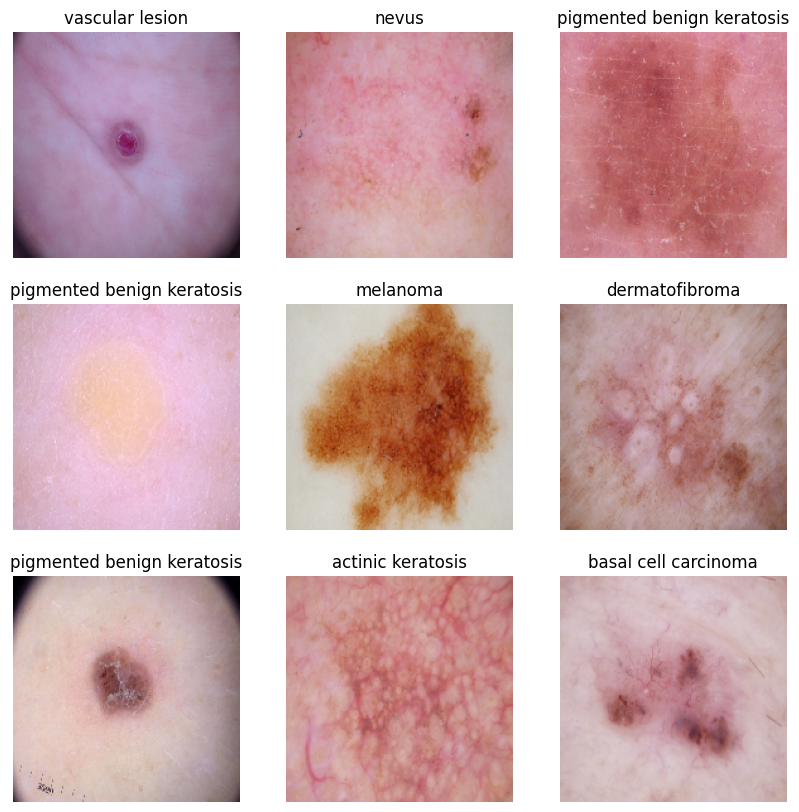

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [97]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [9]:
# First try

In [14]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)) )
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 43, 43, 64)        3

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [29]:
for images, labels in train_ds.take(1):  # Take one batch from the dataset
    for i in range(labels.shape[0]):  # Iterate over samples in the batch
        print("Label:", labels[i] , " class : " ,class_names[labels[i]])  # Print the class name for each sample

Label: tf.Tensor(5, shape=(), dtype=int32)  class :  pigmented benign keratosis
Label: tf.Tensor(1, shape=(), dtype=int32)  class :  basal cell carcinoma
Label: tf.Tensor(3, shape=(), dtype=int32)  class :  melanoma
Label: tf.Tensor(4, shape=(), dtype=int32)  class :  nevus
Label: tf.Tensor(3, shape=(), dtype=int32)  class :  melanoma
Label: tf.Tensor(3, shape=(), dtype=int32)  class :  melanoma
Label: tf.Tensor(5, shape=(), dtype=int32)  class :  pigmented benign keratosis
Label: tf.Tensor(5, shape=(), dtype=int32)  class :  pigmented benign keratosis
Label: tf.Tensor(3, shape=(), dtype=int32)  class :  melanoma
Label: tf.Tensor(4, shape=(), dtype=int32)  class :  nevus
Label: tf.Tensor(3, shape=(), dtype=int32)  class :  melanoma
Label: tf.Tensor(3, shape=(), dtype=int32)  class :  melanoma
Label: tf.Tensor(3, shape=(), dtype=int32)  class :  melanoma
Label: tf.Tensor(3, shape=(), dtype=int32)  class :  melanoma
Label: tf.Tensor(5, shape=(), dtype=int32)  class :  pigmented benign ke

In [11]:
# loss function appropriate for multi-class classification, such as
# categorical_crossentropy (if your labels are one-hot encoded)
# or sparse_categorical_crossentropy (if your labels are integer class indices).

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 43, 43, 64)        3

### Train the model

In [18]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 18s 80ms/step - loss: 2.0449 - accuracy: 0.2026 - val_loss: 2.0244 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 2.0193 - accuracy: 0.2439 - val_loss: 2.0021 - val_accuracy: 0.2841
Epoch 3/20
56/56 [==============================] - 2s 30ms/step - loss: 1.9956 - accuracy: 0.2528 - val_loss: 1.9839 - val_accuracy: 0.2148
Epoch 4/20
56/56 [==============================] - 2s 29ms/step - loss: 1.9673 - accuracy: 0.2634 - val_loss: 1.9078 - val_accuracy: 0.3758
Epoch 5/20
56/56 [==============================] - 2s 31ms/step - loss: 1.9378 - accuracy: 0.2935 - val_loss: 1.8613 - val_accuracy: 0.3557
Epoch 6/20
56/56 [==============================] - 2s 30ms/step - loss: 1.8901 - accuracy: 0.3052 - val_loss: 1.8055 - val_accuracy: 0.3624
Epoch 7/20
56/56 [==============================] - 2s 30ms/step - loss: 1.8687 - accuracy: 0.3186 - val_loss: 1.9671 - val_accuracy: 0.2908
Epoch 8/20
5

### Visualizing training results

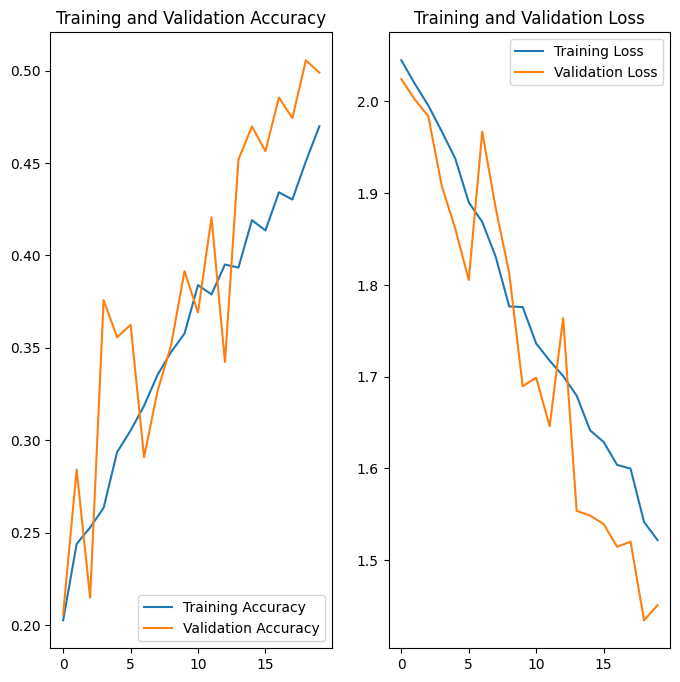

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [14]:
# 1. The Training and validation accuracy are almost same and are very low ( <50 )
#  which indicates that the model is underfitting
# 2. Training loss is very low, but validation loss is fluctuating but is low.
# 3. Validation accuracy is higher than training accuracy but still low

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

Data Augmentation to resolve underfiiting

In [16]:
# This approach applies the augmentations to each image
# in the dataset as it is loaded.
# We have fliped the image vertoically and horizontally,
# random changes to the brightness and contrast

In [ ]:
def augment(image, label):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_brightness(image, max_delta=0.2)
  image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
  image = tf.image.random_flip_up_down(image)
  image = tf.image.rot90(image)
  # Add more augmentations as needed
  return image, label

train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

### Todo:
### Create the model, compile and train the model


In [48]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)) )
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(9, activation='softmax'))

In [49]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 45, 45, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 43, 43, 128)      

In [53]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 127ms/step - loss: 1.5244 - accuracy: 0.4660 - val_loss: 1.5004 - val_accuracy: 0.4541
Epoch 2/20
56/56 [==============================] - 8s 135ms/step - loss: 1.5586 - accuracy: 0.4364 - val_loss: 1.4985 - val_accuracy: 0.4810
Epoch 3/20
56/56 [==============================] - 8s 147ms/step - loss: 1.5453 - accuracy: 0.4570 - val_loss: 1.4455 - val_accuracy: 0.4899
Epoch 4/20
56/56 [==============================] - 7s 122ms/step - loss: 1.5156 - accuracy: 0.4648 - val_loss: 1.3850 - val_accuracy: 0.5369
Epoch 5/20
56/56 [==============================] - 8s 147ms/step - loss: 1.4723 - accuracy: 0.4794 - val_loss: 1.7037 - val_accuracy: 0.4004
Epoch 6/20
56/56 [==============================] - 7s 123ms/step - loss: 1.4913 - accuracy: 0.4632 - val_loss: 1.4259 - val_accuracy: 0.4877
Epoch 7/20
56/56 [==============================] - 7s 121ms/step - loss: 1.5267 - accuracy: 0.4665 - val_loss: 1.4942 - val_accuracy: 0.4698
Epoch 

### Compiling the model

In [103]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 89, 89, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 41, 41, 128)     

In [104]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### Training the model

In [98]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 21s 159ms/step - loss: 1.9860 - accuracy: 0.2461 - val_loss: 2.1711 - val_accuracy: 0.2146
Epoch 2/20
56/56 [==============================] - 3s 57ms/step - loss: 1.9439 - accuracy: 0.2589 - val_loss: 2.0741 - val_accuracy: 0.2621
Epoch 3/20
56/56 [==============================] - 3s 58ms/step - loss: 1.9217 - accuracy: 0.2980 - val_loss: 2.1123 - val_accuracy: 0.2287
Epoch 4/20
56/56 [==============================] - 3s 60ms/step - loss: 1.8746 - accuracy: 0.2980 - val_loss: 2.0548 - val_accuracy: 0.2086
Epoch 5/20
56/56 [==============================] - 3s 57ms/step - loss: 1.8518 - accuracy: 0.3114 - val_loss: 2.0929 - val_accuracy: 0.2168
Epoch 6/20
56/56 [==============================] - 3s 57ms/step - loss: 1.7977 - accuracy: 0.3348 - val_loss: 2.0622 - val_accuracy: 0.2710
Epoch 7/20
56/56 [==============================] - 3s 57ms/step - loss: 1.8158 - accuracy: 0.3281 - val_loss: 1.9471 - val_accuracy: 0.2680
Epoch 8/20


### Visualizing the results

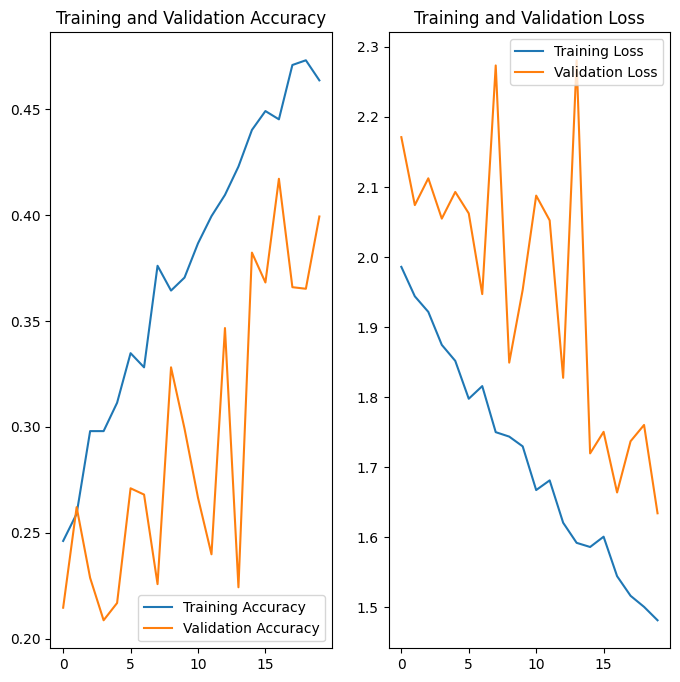

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# Data Augmentation to resolve underfiiting

In [101]:
def augment(image, label):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_brightness(image, max_delta=0.2)
  image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
  image = tf.image.random_flip_up_down(image)
  image = tf.image.rot90(image)
  # Add more augmentations as needed
  return image, label

train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

In [105]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 125ms/step - loss: 2.0620 - accuracy: 0.1964 - val_loss: 2.0246 - val_accuracy: 0.2662
Epoch 2/20
56/56 [==============================] - 6s 101ms/step - loss: 2.0246 - accuracy: 0.2081 - val_loss: 1.9963 - val_accuracy: 0.2707
Epoch 3/20
56/56 [==============================] - 7s 114ms/step - loss: 1.9988 - accuracy: 0.2333 - val_loss: 1.9637 - val_accuracy: 0.2550
Epoch 4/20
56/56 [==============================] - 6s 100ms/step - loss: 1.9624 - accuracy: 0.2606 - val_loss: 1.8960 - val_accuracy: 0.3266
Epoch 5/20
56/56 [==============================] - 7s 127ms/step - loss: 1.9039 - accuracy: 0.2913 - val_loss: 1.9376 - val_accuracy: 0.2617
Epoch 6/20
56/56 [==============================] - 6s 110ms/step - loss: 1.9022 - accuracy: 0.2980 - val_loss: 1.8137 - val_accuracy: 0.3490
Epoch 7/20
56/56 [==============================] - 6s 101ms/step - loss: 1.8480 - accuracy: 0.3259 - val_loss: 1.7848 - val_accuracy: 0.3445
Epoch 

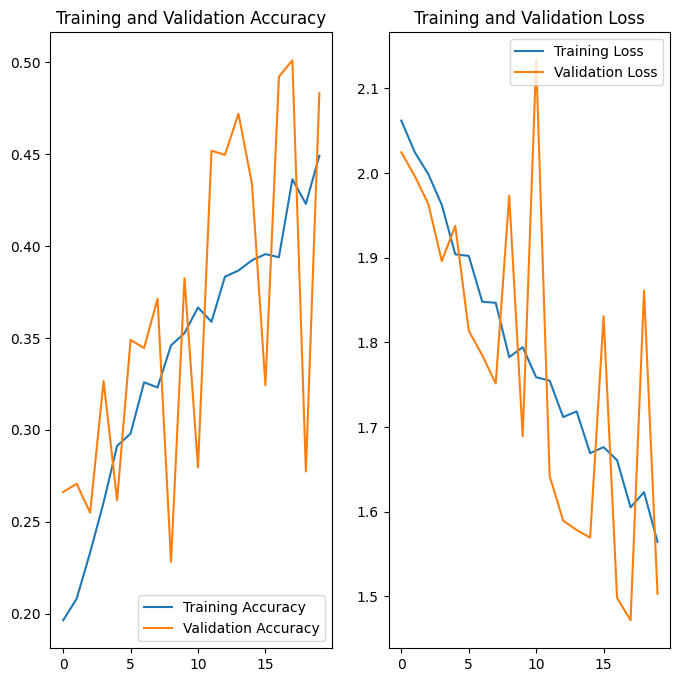

In [106]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

In [17]:
# Findings
# The Training accuracy and validation accuracy are again similar.
# Accuracy is still very low. The model requires more epochs to train with class imbalance handled.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [55]:
import numpy as np

class_counts = {}
for images, labels in train_ds:  # Iterate over the training dataset
    for label in labels.numpy():
        class_name = class_names[label]
        if class_name in class_counts:
            class_counts[class_name] += 1
        else:
            class_counts[class_name] = 1

# Print the class distribution
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} samples")

nevus: 277 samples
actinic keratosis: 92 samples
melanoma: 352 samples
squamous cell carcinoma: 142 samples
vascular lesion: 115 samples
basal cell carcinoma: 309 samples
pigmented benign keratosis: 370 samples
seborrheic keratosis: 58 samples
dermatofibroma: 77 samples


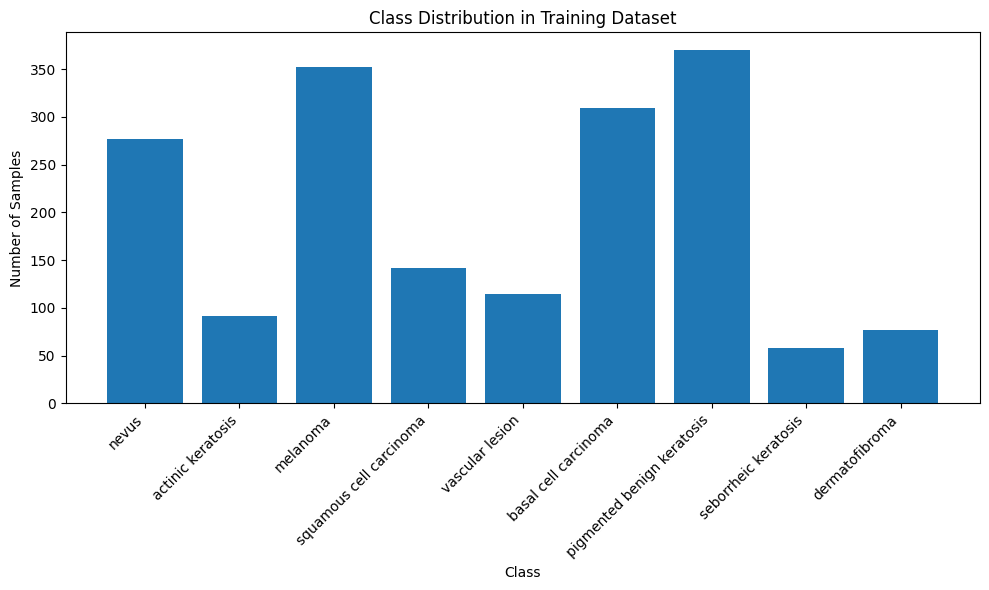

In [56]:
# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Dataset")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?

#### Ans: seborrheic keratosis: 58 samples

#### - Which classes dominate the data in terms proportionate number of samples?

#### Ans : pigmented benign keratosis: 370 samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [57]:
!pip install Augmentor

In [7]:
path_to_training_dataset="/content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [59]:
path_to_training_dataset="/content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E7923E13DF0>: 100%|██████████| 500/500 [00:15<00:00, 31.47 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E7923E32710>: 100%|██████████| 500/500 [00:15<00:00, 32.65 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E7923E5F670>: 100%|██████████| 500/500 [00:15<00:00, 31.89 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E7923E5F610>: 100%|██████████| 500/500 [01:16<00:00,  6.57 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7E7923F90490>: 100%|██████████| 500/500 [01:04<00:00,  7.70 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E7914B076D0>: 100%|██████████| 500/500 [00:15<00:00, 32.84 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E7914D3DB10>: 100%|██████████| 500/500 [00:33<00:00, 14.94 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7E7923FB64A0>: 100%|██████████| 500/500 [00:14<00:00, 33.87 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E7923E668F0>: 100%|██████████| 500/500 [00:15<00:00, 32.75 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [60]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [66]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030707.jpg_f53ea9c0-050e-4ed5-b098-9d69994bc192.jpg',
 '/content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0031570.jpg_fe279478-5361-4ae8-85fe-d8a51dcd7b5b.jpg',
 '/content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0030991.jpg_e1038ccf-711c-41bb-a4e9-50c563a6cf74.jpg',
 '/content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous cell carcinoma_original_ISIC_0031918.jpg_02d43a84-40c5-4161-a7a9-9b41ed517f29.jpg',
 '/content/CNNAssignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output/squamous

In [67]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carc

In [69]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [72]:
from types import new_class
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)
new_df = df2

In [73]:
new_df['Label'].value_counts()

Label
squamous cell carcinoma       500
seborrheic keratosis          500
nevus                         500
dermatofibroma                500
basal cell carcinoma          500
actinic keratosis             500
vascular lesion               500
pigmented benign keratosis    500
melanoma                      500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [4]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [8]:
data_dir_train= path_to_training_dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [78]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)) )
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(9, activation='softmax'))

In [13]:
#CNN Model Architecture

#Sequential allows you to create models layer-by-layer
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 128)      

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [85]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 35s 86ms/step - loss: 2.1696 - accuracy: 0.1638 - val_loss: 2.1415 - val_accuracy: 0.1693
Epoch 2/30
169/169 [==============================] - 9s 54ms/step - loss: 2.0852 - accuracy: 0.2101 - val_loss: 2.1344 - val_accuracy: 0.1856
Epoch 3/30
169/169 [==============================] - 9s 54ms/step - loss: 2.0065 - accuracy: 0.2420 - val_loss: 1.8629 - val_accuracy: 0.2866
Epoch 4/30
169/169 [==============================] - 9s 52ms/step - loss: 1.9560 - accuracy: 0.2585 - val_loss: 1.8044 - val_accuracy: 0.2984
Epoch 5/30
169/169 [==============================] - 9s 53ms/step - loss: 1.8875 - accuracy: 0.2810 - val_loss: 1.7781 - val_accuracy: 0.3252
Epoch 6/30
169/169 [==============================] - 9s 52ms/step - loss: 1.8035 - accuracy: 0.3312 - val_loss: 1.6515 - val_accuracy: 0.3853
Epoch 7/30
169/169 [==============================] - 9s 52ms/step - loss: 1.6696 - accuracy: 0.3770 - val_loss: 1.7361 - val_accuracy: 0.374

In [21]:
# Different Run
epochs = 6
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/6
169/169 [==============================] - 9s 56ms/step - loss: 0.3775 - accuracy: 0.8589 - val_loss: 0.4875 - val_accuracy: 0.8330
Epoch 2/6
169/169 [==============================] - 9s 54ms/step - loss: 0.3515 - accuracy: 0.8685 - val_loss: 0.4968 - val_accuracy: 0.8270
Epoch 3/6
169/169 [==============================] - 9s 54ms/step - loss: 0.3170 - accuracy: 0.8778 - val_loss: 0.4705 - val_accuracy: 0.8374
Epoch 4/6
169/169 [==============================] - 9s 54ms/step - loss: 0.3221 - accuracy: 0.8752 - val_loss: 0.4526 - val_accuracy: 0.8515
Epoch 5/6
169/169 [==============================] - 9s 55ms/step - loss: 0.2947 - accuracy: 0.8802 - val_loss: 0.4677 - val_accuracy: 0.8352
Epoch 6/6
169/169 [==============================] - 9s 55ms/step - loss: 0.3008 - accuracy: 0.8856 - val_loss: 0.4597 - val_accuracy: 0.8278


#### **Todo:**  Train your model

#### **Todo:**  Visualize the model results

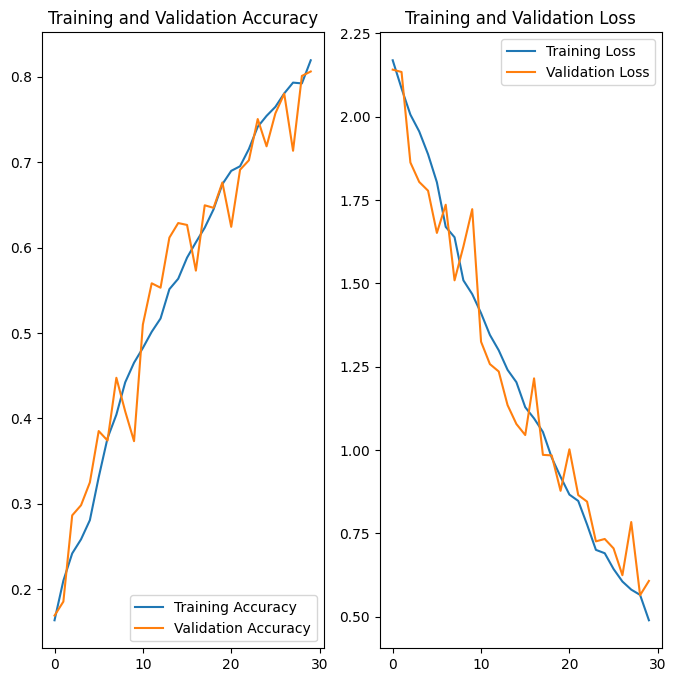

In [86]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
# The model was able to learn the patterns now properly
# The training and Validation accuracy both improved
# The validation accuracy was 0.83 which is a big improvment from previous runs

In [18]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  labels='inferred',
  image_size=(img_height, img_width),
  shuffle=False,
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [23]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_ds)

# Print the test accuracy
print("Test accuracy:", accuracy)

4/4 [==============================] - 3s 966ms/step - loss: 3.7970 - accuracy: 0.4068
Test accuracy: 0.4067796468734741


1/1 [==============================] - 1s 564ms/step
Actual Class basal cell carcinoma
Predictive Class basal cell carcinoma


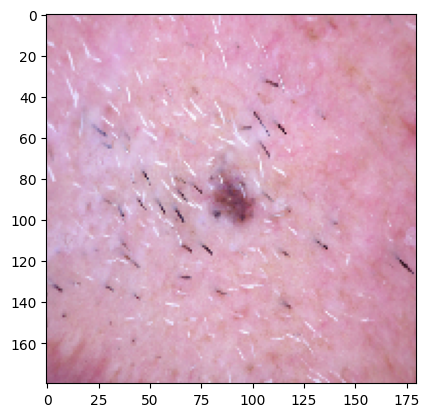

In [108]:
from tensorflow.keras.preprocessing.image import load_img
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )